#Hand written digit recognition with CNN

In [4]:
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten

In [5]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
# Getting image shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[0]

5

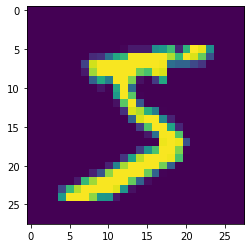

In [9]:
plt.imshow(X_train[0])

In [12]:
# Reshape the data to fit the model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [13]:
#One - Hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [17]:
#Building CNN model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
# Train the model
hist = model.fit(X_train, y_train_one_hot,validation_data=(X_test,y_test_one_hot), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 176s 94ms/step - loss: 0.9498 - accuracy: 0.9000 - val_loss: 0.1045 - val_accuracy: 0.9681
Epoch 2/3
1875/1875 [==============================] - 174s 93ms/step - loss: 0.0690 - accuracy: 0.9794 - val_loss: 0.0966 - val_accuracy: 0.9711
Epoch 3/3
1875/1875 [==============================] - 176s 94ms/step - loss: 0.0462 - accuracy: 0.9852 - val_loss: 0.1029 - val_accuracy: 0.9745


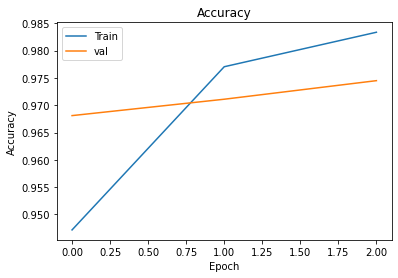

In [24]:
#Visualize the accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'], loc='upper left')
plt.show()

In [26]:
# Show predictions as probabilities for the first 5 images
predictions = model.predict(X_test[:5])
predictions

array([[7.7615137e-11, 9.6723058e-14, 9.9857692e-11, 2.8282867e-11,
        3.9904291e-17, 8.8654558e-17, 4.6263662e-17, 1.0000000e+00,
        3.5233139e-10, 1.9868250e-13],
       [2.1883915e-07, 3.3019674e-08, 9.9999964e-01, 1.6923808e-11,
        5.3785362e-12, 1.0513181e-15, 7.8327432e-08, 7.9210380e-12,
        2.8641558e-09, 3.9689767e-17],
       [6.9435444e-09, 9.9985909e-01, 1.4283675e-06, 1.2170376e-10,
        1.2454214e-04, 2.0348830e-07, 2.8695601e-07, 2.1126034e-08,
        1.4447065e-05, 1.8493916e-08],
       [1.0000000e+00, 7.0730666e-17, 7.7025604e-09, 1.4263059e-14,
        2.5692762e-12, 4.5024822e-12, 1.6245706e-10, 1.6045592e-11,
        8.5409874e-11, 3.5479011e-10],
       [1.3853622e-08, 4.4940260e-10, 1.7798721e-08, 6.1303796e-12,
        9.9997306e-01, 2.3962399e-12, 8.0795662e-11, 4.9923221e-10,
        2.3443368e-08, 2.6886226e-05]], dtype=float32)

In [28]:
print(np.argmax(predictions, axis=1))
print(y_test[:5])

[7 2 1 0 4]
[7 2 1 0 4]


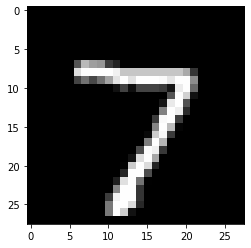

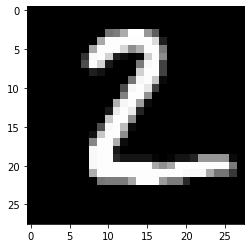

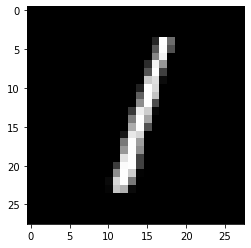

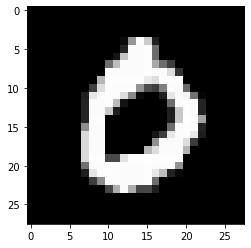

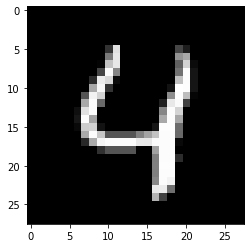

In [31]:
for i in range(0,5):
  image = X_test[i]
  image = np.array(image, dtype='float')
  pixels = image.reshape(28,28)
  plt.imshow(pixels, cmap='gray')
  plt.show()